<div class="alert alert-block alert-info">

<h1><center> ===| PHYS***** - Project 3 |=== </center></h1>

<h2><i><center> Monte Carlo Techniques - Neutron Transport and Scattering Through a Shielding Layer </center></i></h2>
  
<b><center> James Emberton - ID: ******** </center></b>

<b><center> University of Manchester </center></b>

<b><center> May 2025 </center></b>

</div>

***

Import and initialise:

In [1]:
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import N_A
from tqdm import tqdm

## Contents
<b> [1 - Introduction](#1---Introduction)

<b> [2 - Uniform Random Distributions](#2---Uniform-Random-Distributions)

> [2.1 - 1-D Uniform Random Distribution](#2.1---1-D-Uniform-Random-Distribution)

> [2.2 - 3-D Uniform Random Distribution](#2.2---3-D-Uniform-Random-Distribution)

> [2.3 - Exponential Distribution](#2.3---Exponential-Distribution)

> [2.4 - Spherical Isotropic Unit Vectors](#2.4---Spherical-Isotropic-Unit-Vectors)

<b> [3 - Neutrons Encountering a Shielding Layer](#3---Neutrons-Encountering-a-Shielding-Layer)

> [3.1 - Determining Material Properties](#3.1---Determining-Material-Properties)

> [3.2 - Visualisation of Neutron Path](#3.2---Visualisation-of-Neutron-Path)

> [3.3 - Quantification of Neutron Scattering](#3.3---Quantification-of-Neutron-Scattering)

> [3.4 - Variable Slab Thickness](#3.4---Variable-Slab-Thickness) 

> [3.5 - Determining Attenuation Lengths and Conclusion](#3.5---Determining-Attenuation-Lengths-and-Conclusion)

<b> [4 - Extension - Woodcock Method](#4---Extension---Woodcock-Method)

<b> [5 - References](#5---References)


***

## 1 - Introduction

In this notebook, we aim to explore how neutron transport through a shielding slab is affected by material and slab width. We also wish to investigate the processes involved with neutron transport and their underlying statistics, using <b> Monte Carlo simulation </b> for slabs of water, lead and graphite, assessing each one's differences. These processes include:

* <b> Scattering</b>; a neutron interacts with a particle within the shielding layer and its trajectory is changed,
  
* <b> Absorption</b>; a neutron's energy is absorbed completely by a particle within the shielding layer and hence the neutron is transported no further,
  
* <b> Reflection</b>; a neutron exits the slab from the face from which it entered, and
  
* <b> Transmission</b>; a neutron exits the slab from the opposite face from which it entered.

Monte Carlo simulation is an important statistical tool which we will use to track the paths and interactions of $10,000$ neutrons through a shielding slab. Each movement of a particular neutron is decided via random sampling, based on a material's characteristic <b> mean free path </b>. The mean free path, denoted $\lambda_{sc}$ for scattering or $\lambda_{ab}$ (unit metres) for absorption throughout this report, is defined as

\begin{equation*}
\lambda = \frac{1}{\Sigma}, \tag{1}
\end{equation*}

where $\Sigma$ (m$^{-1}$) is the <b> macroscopic cross-section </b>, defined as $\Sigma = n\sigma$. $\sigma$ is the <b> microscopic cross-section </b>, (m$^{2}$), and $n$ is the material particle density (m$^{-3}$), and both are characteristic to the shielding layer material. The mean free path in simple terms can be imagined as the average distance a particle (a neutron in this case) travels within a material before it is scattered ($\lambda_{sc}$) or absorbed ($\lambda_{ab}$). The actual distance a neutron travels in a particular step is not the mean free path but is instead determined from a <b> probability distribution </b> based around it,

\begin{equation*}
P[x] = e^{-\frac{x}{\lambda}}, \tag{2}
\end{equation*}

where $x$ is the distance the neutron has travelled (m) uninterupted through the shielding layer in one dimension, and $\lambda$ is the mean free path as previously discussed. We can expand this to three dimensions by switching $x$ for $r$ and moving into spherical coordinates, which will be discussed more in section 2.4.

Monte Carlo simulation is incredibly important as it not only effectively models our neutron scattering while representing the system's geometry, but enables radiation safety equipment to be developed, including astronaut suit radiation shielding [(Chen Y.Q, Yan, B.H, 2023)](#5---References) and more specifically to the context of thermal neutrons, nuclear reactor sheilding. Neutron attenuation through materials is an important area of study for testing for the presence of light or hydrogenous molecules [(Parise, J. B., 2006)](#5---References). Our final aim of the main body of this report is to find the <b> characteristic attenuation length </b> for the transmission of neutrons through each material, which quantifies how transmission rates are affected as a function of shielding layer thickness.

<b> [Go Back To Contents](#Contents)

***

## 2 - Uniform Random Distributions

To begin the discussion, we start simple. For our neutrons to take a step randomly, we need a random distribution. However, we do not want a particular value to be any more likely than another - we want the distribution to be <b> uniform </b>. If we were to generate a uniform, random distribution made up of $1000$ points that can take any integer value from $1$ to $10$, we would aproximately expect $100$ of each number. We can then plot on a bar chart what we actually get when we generate that distribution, to see if any integer is more common than another. Of course there will be natural deviation, however if there is no statistically significant deviation from what is expected, then we can conclude that the distribution is indeed uniform.

### 2.1 - 1-D Uniform Random Distribution

Our first real cell of code will be to generate a simple, one-dimensional, uniform, random distribution with $10,000$ samples that can take any value between $0$ and $1$. As that range is continuous, we can use a histogram to plot <b> bins </b> which contain all particles within a smaller range of the $0$ to $1$ range. We will use $50$ bins for $10,000$ samples, so we would expect $200$ samples in each bin if the distribution is uniform. Let's see what we get:

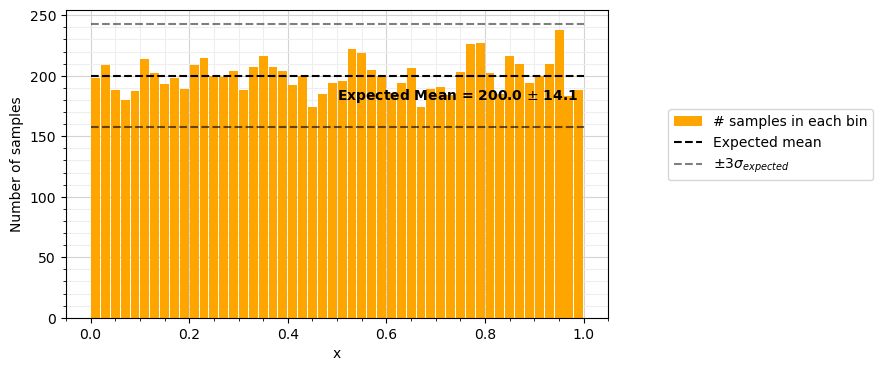

In [2]:
# Sets sample number at 10,000
samples = 10000

# Creates a uniform distribution of the samples between 0 and 1
uniform_test_1d = np.random.uniform(low = 0, high = 1, size = samples)

# Creates a figure and axis for our histogram
fig, ax = plt.subplots(figsize = (7,4))

# Plots the histogram and sets some variables such as heights of the bins and x values of each bin
heights, bins, patches = ax.hist(uniform_test_1d, 50, color = 'orange', rwidth = 0.9, label = '# samples in each bin', zorder = 2)

# sets axis labels
ax.set_ylabel('Number of samples')
ax.set_xlabel('x')

# Calculates the expected mean number of samples in each bin for a uniformly distributed sample
expected_mean = samples / len(heights)

# Calculates the expected standard deviation with guassian uncertainty
expected_std = np.sqrt(expected_mean)

# Plots horizontal lines at expected mean, and for plus or minus 3 expected standard deviations.
ax.hlines(y = expected_mean, xmin = 0, xmax = 1, linestyles = '--', color = 'black', label = 'Expected mean')
ax.hlines(y = expected_mean+3*expected_std, xmin = 0, xmax = 1, linestyles = '--', color = 'black', label = r'$\pm$3$\sigma_{expected}$', alpha = 0.5)
ax.hlines(y = expected_mean-3*expected_std, xmin = 0, xmax = 1, linestyles = '--', color = 'black', alpha = 0.6)

# Displays the expected mean and its standard deviation on the figure
ax.text(0.5, 180, rf'Expected Mean = {expected_mean} $\pm$ {expected_std:.3g}', weight = 'bold')

# Positions legend
ax.legend(bbox_to_anchor = (1.5, 0.7));

# Creates a grid for clarity
ax.grid(which = 'major', color = 'lightgray', zorder = 0)
ax.grid(which = 'minor', color = '#EEEEEE', zorder = 0)
ax.minorticks_on()

<div class="alert alert-block alert-info">
<h5><b>Figure 1</b></h5>
A uniform, random distribution of $10,000$ samples in range $0<x<1$ plotted on a histogram.
</div>

As expected, we find that there is no statistically significant deviation from the expected number of samples per bin. Therefore, we can conclude that we have created a uniform random distribution - any value between 0 and 1 generated in this way is as likely as any other value.

<b> [Go Back To Contents](#Contents)

***

### 2.2 - 3-D Uniform Random Distribution

We can do the exact same thing but in three dimensions - all we have to do is add a $y$ and $z$ distribution to our pre-existing $x$ distribution to create randomised coordinates, with $0<x,y,x<1$. We would expect that, to be uniform, the entire cube will, instead of having a constant bar height like in Figure 1, have a constant sample number density. Of course, as before, we expect small deviations, but nothing statistically significant.

The cell below creates a three dimensional plot for the visualisation of these random coordinates, and colour codes them based on the particle density of their surrounding region. We will use a lower number of samples, $2,000$ instead of $10,000$ before, as it makes visualising the samples' spread much easier.

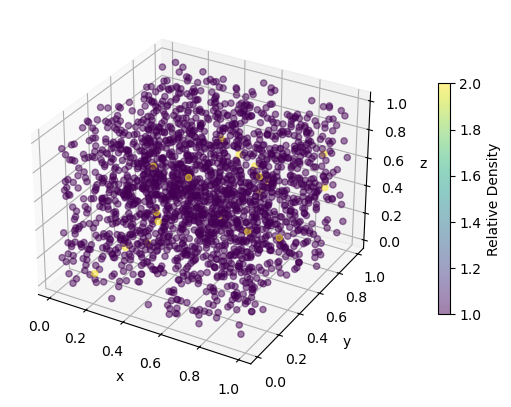

In [3]:
# Sets number of samples
samples_new = 2000

# Generates random uniform distributions with 1000 samples each to create sets of 3D coordinates
uniform_test_x = np.random.uniform(low=0, high=1, size = samples_new)
uniform_test_y = np.random.uniform(low=0, high=1, size = samples_new)
uniform_test_z = np.random.uniform(low=0, high=1, size = samples_new)

# Creates bins in each axis (which will create small cubes within the distribution)
x_bins = np.linspace(0, 1, 50)
y_bins = np.linspace(0, 1, 50)
z_bins = np.linspace(0, 1, 50)

# Creates a 3D histogram for density propagation
hist, edges = np.histogramdd(np.vstack([uniform_test_x, uniform_test_y, uniform_test_z]).T, bins=(x_bins, y_bins, z_bins))

# Find centres of each little cube
x_centers = (edges[0][1:] + edges[0][:-1]) / 2
y_centers = (edges[1][1:] + edges[1][:-1]) / 2
z_centers = (edges[2][1:] + edges[2][:-1]) / 2

# Need to flatten all of the grids to make meshes
x_grid, y_grid, z_grid = np.meshgrid(x_centers, y_centers, z_centers, indexing='ij')
x_grid = x_grid.flatten()
y_grid = y_grid.flatten()
z_grid = z_grid.flatten()
density_values = hist.flatten()

# Mask to avoid plotting empty bins on the figure
mask = density_values > 0

# Creates axis for plotting the 3D distribution
fig = plt.figure(figsize = (6.5, 6))

# Creating 3D axis
ax = fig.add_subplot(111, projection = '3d')

# Scatter plots the density values and puts on a colour map to visualise difference in density
scatter_3d = ax.scatter(x_grid[mask], y_grid[mask], z_grid[mask], c = density_values[mask], cmap = 'viridis', marker = 'o', alpha = 0.5)

# Plots the colour bar (and formats it) which visualises the relative density of each point
plt.colorbar(scatter_3d, ax=ax, shrink=0.5, label = 'Relative Density', pad = 0.1)

# Sets axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

<div class="alert alert-block alert-info">
<h5><b>Figure 2</b></h5>
A $3$D uniform, random distribution of coordinates with a heat map of sample density.
</div>

The vast majority of areas in the cube have the same sample density, with only small deviations that appear to be placed randomly. This checks our box for it to be uniform! Before we move on, let's see what can go wrong with the generation of random 3D coordinates.

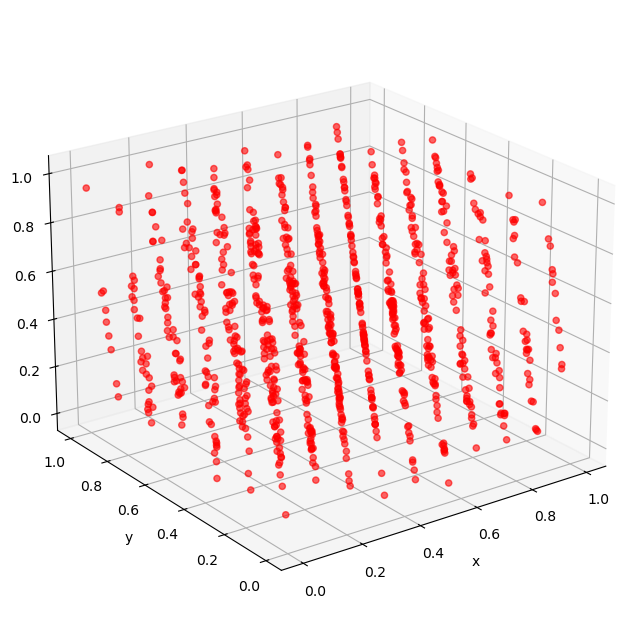

In [4]:
# Function to generate random numbers with spectral issues, as copied from the randssp on
# the blackboard page
def randssp(p, q):
    
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
        
    r = np.zeros([p, q])
    for l in range(q):
        for k in range(p):
            x = np.mod(a * x + c, m)
            r[k, l] = int(x) / int(m)
    
    return r

# Generate a long 1-D sequence
num_vals = 1000

# Calls the function to generate the random values
r = randssp(num_vals, 1).flatten()

# Create x, y and z coordinate from the random distribution
xyz = np.array([r[i:i+3] for i in range(len(r) - 2)])

# Creates figure and projects it to 3D
fig = plt.figure(figsize = (6.5, 6.5))
ax = fig.add_subplot(111, projection='3d')

# Scatters xyz coordinates
ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], alpha = 0.6, color = 'red')

# Axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Sets a fixed view
ax.view_init(22, 234)

plt.tight_layout()

<div class="alert alert-block alert-info">
<h5><b>Figure 3</b></h5>
A $3$D plot of a distribution with spectral issues. The points appear to group in streaks, when viewed at an angle of 22$\degree$ elevation and 234$\degree$ azimuth.
</div>

It is clear from Figure 3 that there is a spectral issue - the points seem to cluster in lines when viewed from a particular angle. This is a problem if we want a uniform random distribution - we don't want any implicit directional bias. There is something to be said about continuing the rest of this report but using this incorrect generation method instead to determine just how wrong it may be - but we will leave that for another time. 

<b> [Go Back To Contents](#Contents)

***

### 2.3 - Exponential Distribution

Whilst generating uniform, random distributions is useful, our neutrons are not taking completely random steps. As outlined in the introduction, each material has its own characteristic mean free path of scattering and absorption for neutrons, which limits how far a neutron can travel before it interacts with one of those processes. Therefore, the distribution of neutron distances travelled between interactions within a shielding layer will be exponential in nature, such as that shown in Equation $2$. This acts as our <b> probability density function (PDF) </b>, and we can use <b> inverse distribution sampling </b> to turn a uniform, random distribution into one that is distributed via Equation $2$.

To do this, we must first integrate our PDF, to get the <b> cumulative distribution function (CDF) </b>:

\begin{equation*}
cdf(x) = \int pdf(x) = \int_{0}^{x} e^{-\frac{x}{\lambda}} dx
\end{equation*}

which becomes

\begin{equation*}
cdf(x) = -\lambda(1 - e^{-\frac{x}{\lambda}}). \tag{3}
\end{equation*}

Now, we take the inverse of this to form the <b> inverse CDF </b>, which gives us the transformation from how to get from the uniform, random distribution to our desired exponential distribution:

\begin{equation*}
cdf^{-1}(x) = -\lambda \log({u_i)} \tag{4}
\end{equation*}

where we have simply swapped $x$ for $u_i$ where $u_i$ is a randomly generated number from our previous uniform random distributions from sections $2.1$ and $2.2$. Using Equation $1$, we can calculate the mean free path of absorption (ignoring scattering) for water using its characteristic microscopic cross-section of absorption, which we will do below. We can then generate an exponentially distributed set of distances based on this mean free path, and can then re-find the mean free path of absorption for water from that distribution.

We can repeat the process multiple times to create a mean and standard deviation (for statistical analysis), which is all completed below.

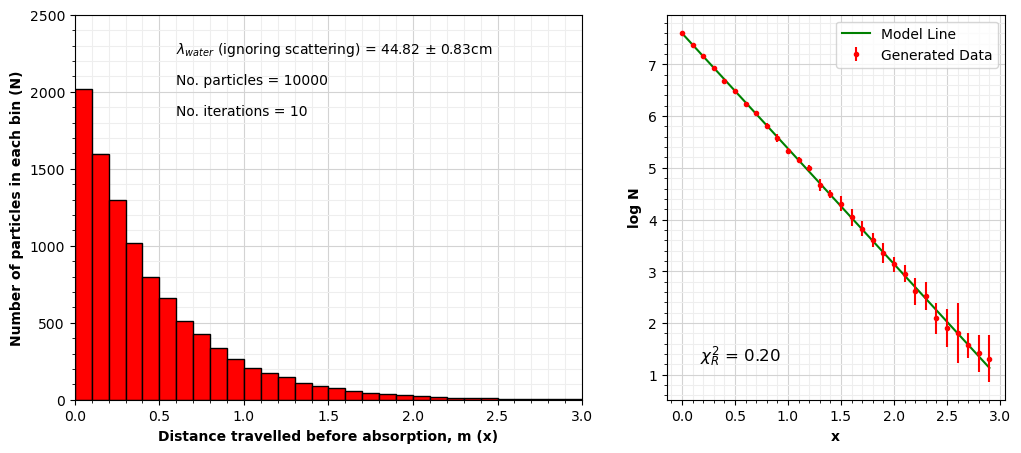

In [5]:
def find_mean_free_path(sigma, rho, M_m):
    '''
    Uses collision cross section, density and molar mass to calculate the mean free path.

    VARIABLES
    -------------------------
    sigma : FLOAT - absorption/scatter cross section for a particular material, m^2
    rho : FLOAT - density of material, kg/m^3
    M_m : FLOAT - molar mass of material, kg/mol
    n : FLOAT - number of absorption/scattering particles
    
    '''
    
    # Calculates the number of particles that can either scatter or absorp (depends on sigma)
    n = (rho * N_A) / M_m

    # Returns the mean free path in m
    return 1 / (sigma * n)

# Define a barn for conversion of units
barn = 1e-28 #m^2

# Define values for water (some defined before but all redefined for clarity)
sigma_ab_w = 0.6652 * barn # Absorption cross-section, m^2
sigma_sc_w = 103 * barn # Scattering cross-section, m^2
rho_w = 1 * 1e3 # Density, kg/m^3
M_m_w = 18.0153 * 1e-3 # Molar mass of water, kg/mol

# Find the absorption and scattering mean free paths for water
lambda_ab_w = find_mean_free_path(sigma_ab_w, rho_w, M_m_w)
lambda_sc_w = find_mean_free_path(sigma_sc_w, rho_w, M_m_w) 

# Define a few variables
n_iter = 10 # Number of times we will simulate the system
n_bins = 30 # Number of histogram bins
rmax = 3 # Maximum distance we will plot, m
n_particles = 10000 # Number of particles in simulation

counts = np.zeros((n_iter, n_bins)) # Holds all the counts in each bin for each iteration, n_iter x n_bins shape
mean_counts = np.zeros(n_bins) # 1 x n_bins to hold the mean value of each bin over the iterations
std_counts = np.zeros(n_bins) # 1 x n_bins to hold all the standard deviations

# Creates a histogram of the 10000 particle's distances for each iteration
for i in range(n_iter):
    counts[i,:], pos_bins = np.histogram(-lambda_ab_w * np.log(np.random.uniform(size = n_particles)), bins = n_bins, range = (0,rmax))

# Removes final value of the bins array as there is one extra value compared to the counts length
pos_bins = pos_bins[:-1]

# Finds the mean and standard deviation of each bin in each iteration
for i in range(n_bins):
    mean_counts[i] = np.mean(counts[:,i])
    std_counts[i] = np.std(counts[:,i])

# Deletes all zero values in each array
pos_bins = np.delete(pos_bins, np.argwhere(mean_counts == 0))
std_counts = np.delete(std_counts, np.argwhere(mean_counts == 0))
mean_count = np.delete(mean_counts, np.argwhere(mean_counts == 0))

# Finds the error by dividing the standard deviation by the mean for each bin
error = std_counts / mean_counts

# Performs the polyfit for y = e^x, weights it as 1 / error to weigh lower error values
gradient, cov = np.polyfit(pos_bins, np.log(mean_counts), 1, cov = True, w = 1 / error)

# Creates figure to plot our mean histogram and linear fit
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (12, 5), gridspec_kw={'width_ratios': [1.5, 1]})

# Plots the mean bin count as a bar chart
bin_width = rmax / n_bins
ax.bar(pos_bins, mean_counts, width = bin_width, align = 'edge', facecolor = 'red', edgecolor = 'black', zorder = 2)

# Sets labels for the bar chart
ax.set_xlabel('Distance travelled before absorption, m (x)', weight = 'bold')
ax.set_ylabel('Number of particles in each bin (N)', weight = 'bold')

# Sets the x and y axis limits for the bar chart
ax.set(xlim = (0, rmax), ylim = (0, 2500))

# Sets a grid on the bar chart axis
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()

# Displays important information on the bar chart such as the mean free path and its uncertainty
ax.text(0.6, 2250, rf'$\lambda_{{water}}$ (ignoring scattering) = {(-1 / gradient[0]) * 100:.2f} $\pm$ {np.sqrt(cov[0][0]) * 100:.2f}cm')
ax.text(0.6, 2050, f'No. particles = {n_particles}')
ax.text(0.6, 1850, f'No. iterations = {n_iter}');

# Plots the log of the mean counts on the y axis of the second plot
ax2.errorbar(pos_bins, np.log(mean_count), yerr = error, color = 'red', zorder = 3, marker = 'o', markersize = 3, ls = '', label = 'Generated Data')

# Plots the ideal line using the parameters provided by the polyfit
ax2.plot(pos_bins, ((pos_bins * gradient[0]) + gradient[1]), color = 'green', zorder = 2, label = 'Model Line')

# Chi-squared analysis
red_chi_sq = (1 / (len(mean_count) - 2)) * np.sum(((((pos_bins * gradient[0]) + gradient[1]) \
                - (np.log(mean_count))) ** 2) / (error ** 2))

ax2.text(0.1, 0.1, rf'$\chi_R^2$ = {red_chi_sq:.2f}', transform = ax2.transAxes, fontsize = 12)

# Places a grid on the linear plot axis
ax2.grid(which = 'major', color = 'lightgray')
ax2.grid(which = 'minor', color = '#EEEEEE')
ax2.minorticks_on()

# Sets labels on the second plot
ax2.set_ylabel('log N', weight = 'bold')
ax2.set_xlabel('x', weight = 'bold')

# Sets legend for the second plot
ax2.legend(loc = 'best');

<div class="alert alert-block alert-info">
<h5><b>Figure 4</b></h5>
(Left) Mean histogram showing the number of neutrons ($y$-axis) travelling particular distances ($x$-axis) before being absorbed within water, successfully showing that the mean free path of absorption for water (ignoring scattering) is approximately 45cm, with a residual plot (right). The histogram is a mean of 10 separately generated histograms that are not shown.
</div>

The distribution is clearly exponential with minimal errors on the right hand residual plot apart from at small $\log{N}$. This is the basis for generating random spherical radii for neutron movements in three dimensions much later in the report.

<b> [Go Back To Contents](#Contents)

***

### 2.4 - Spherical Isotropic Unit Vectors

Now, we move onto dealing with the fact that the neutrons will be moving in $3$D-space, and so will move with not only a randomised length, but also direction. One way this can easily be achieved is by using <b> spherical coordinates </b> to generate a random $r$, $\theta$ and $\phi$ component, and use the trigonometric conversions,

\begin{equation*}
x = r\sin{\theta}\cos{\phi} \tag{5}
\end{equation*}

\begin{equation*}
y = r\sin{\theta}\sin{\phi} \tag{6}
\end{equation*}

\begin{equation*}
z = r\cos{\theta} \tag{7},
\end{equation*}

to yield $x, y$ and $z$ components of a vector. However, just like before, we wish to ensure that our distribution of directions is uniform, i.e. no direction is more likely than any other. If we were to generate uniform, random distributions as we did in section $2.1$ and multipy one of them by $2\pi$ to represent $\phi$ (azimuthal angle) and one by $\pi$ to represent $\theta$ (polar angle), then we would end up with more points concentrated towards the poles than the equator of the spherical distribution. This is of course a completely non-physical result, so we must retain our uniformity. To do this, we can instead distribute our polar angle by

\begin{equation*}
\theta_i = \cos^{-1}(1-2u_i) \tag{8}
\end{equation*}

to create lower concentration regions at the poles to more evenly spread out the pole crowding. Knowing this, let's try to plot a uniform spherical distribution with a fixed radius (for now) of $r=1$ unit:

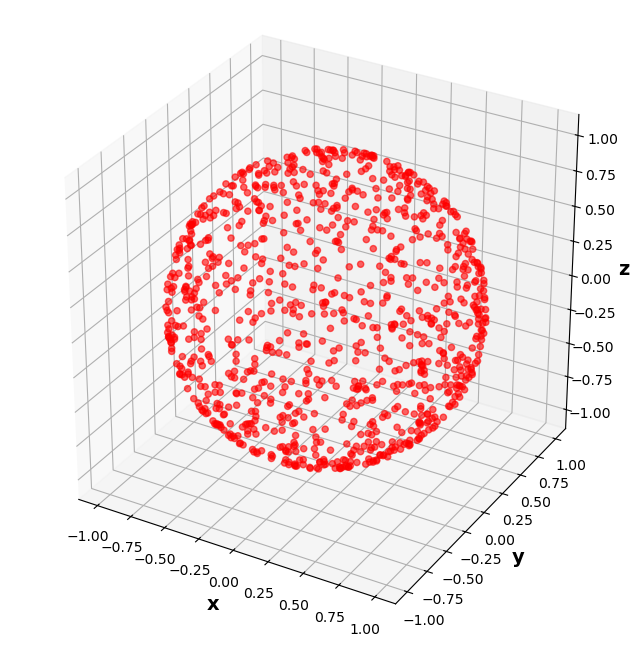

In [6]:
# Set the number of samples as before
samples_sph = 1000

# Creates two sets of random, uniform distributions, one for phi
u_sph_1 = np.random.uniform(low = 0, high = 1, size = samples_sph)
u_sph_2 = np.random.uniform(low = 0, high = 1, size = samples_sph)

# Creates a distribution for phi between 0 and 2pi
phi = u_sph_1 * np.pi * 2

# Creates a distribution for theta between 0 and pi
theta = np.arccos(1 - (2 * u_sph_2))

# Uses those theta and phi to create x y and z coordinates using trig
x_sph = np.sin(theta) * np.cos(phi)
y_sph = np.sin(theta) * np.sin(phi)
z_sph = np.cos(theta)

def plotter_3d(x, y, z):
    '''
    Plots a set of points on a 3D axis.

    VARIABLES
    ---------------------
    x, y, z : ARRAY - x y and z coordinates of the points
    
    '''
    
    # Creates our figure to plot the sphere on
    fig = plt.figure(figsize = (8, 8))
    
    # Adds a 3d projected axis to plot the sphere on
    ax = fig.add_subplot(111, projection = '3d')
    
    # Plots the points on the graph in 3D
    ax.scatter(x, y, z, color = 'red', alpha = 0.6)
    
    # Sets the aspect ratio of the plot so that the sphere actually plots as a sphere and not an ellipsoid
    ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
    
    # Sets axis labels
    ax.set_xlabel('x', weight = 'bold', size = 14)
    ax.set_ylabel('y', weight = 'bold', size = 14)
    ax.set_zlabel('z', weight = 'bold', size = 14)

# Runs the 3D plotter for our sphere using the generated x, y and z coordinates
plotter_3d(x_sph, y_sph, z_sph)

<div class="alert alert-block alert-info">
<h5><b>Figure 5</b></h5>
Spherical distribution of points all with radius $r = 1$ unit to demonstrate uniformity in random direction selection for neutron paths.
</div>

We can now combine what we found in section $2.3$ with our uniform spherical distribution in Figure $4$. Instead of plotting a sphere of fixed radius, we can instead give each randomly generated direction (governed by randomly generated $\theta$ and $\phi$ components) a radius $r$ that is distributed by an exponential law, such as that given by Equation $2$. This will create <b> isotropic </b> vector steps for our neutron. Here, we will use the same mean free path of absorption for water as was used in section $2.3$ for convenience. The equivalent distribution for the mean free path of scattering for water would appear much smaller, as the scattering microscopic cross-section is much larger than the absorption microscopic cross-section.

Let's see how this looks:

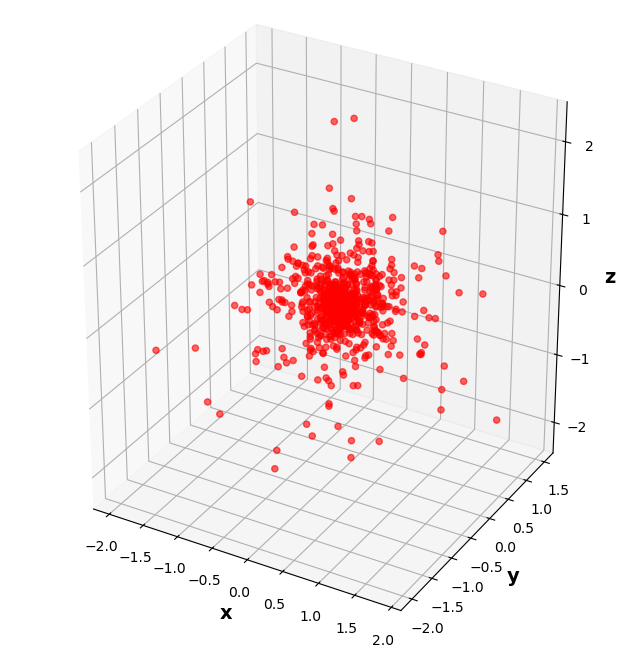

In [7]:
def iso_step():
    '''
    Creates random, uniform, isotropic unit vectors with radii distributed by e^-x/lambda

    VARIABLES
    ---------------------
    u_1/2/3 : ARRAY - 3 random uniform distributions of 1000 samples each between 0 and 1
    phi : ARRAY - phi component of random points
    theta : ARRAY - theta component of random points
    s_iso : ARRAY - randomly distributed radii by e^-x/lambda
    x/y/z_iso : ARRAY - x, y and z components of the vectors

    RETURNS
    ---------------------
    x/y/z_iso : ARRAY - as above
    
    '''
    # Defines 3 random uniform distributions with 1000 samples each between 0 and 1
    u_1 = np.random.uniform(low = 0, high = 1, size = samples_sph)
    u_2 = np.random.uniform(low = 0, high = 1, size = samples_sph)
    u_3 = np.random.uniform(low = 0, high = 1, size = samples_sph)

    # Creates a distribution for phi between 0 and 2pi
    phi = u_1 * np.pi * 2

    # Creates a distribution for theta between 0 and pi
    theta = np.arccos(1 - (2 * u_2))

    # Finds randomly distributed radii from e^-x/mfp where mfp = lambda 
    s_iso = -lambda_ab_w * np.log(u_3) # using water's mean free path from earlier

    # Puts the theta, phi and r components together to create x y and z components via trig
    # conversion
    x_iso = s_iso * np.sin(theta) * np.cos(phi)
    y_iso = s_iso * np.sin(theta) * np.sin(phi)
    z_iso = s_iso * np.cos(theta)

    return x_iso, y_iso, z_iso

# Calls the above functions to generate isotropic vectors with radii distributed exponentially
x, y, z = iso_step()

# Plots these vectors as points on a 3D plot
plotter_3d(x, y, z)

<div class="alert alert-block alert-info">
<h5><b>Figure 6</b></h5>
Isotropic vector steps produced using an exponentially decaying distance function and uniform random direction.
</div>

As expected, there is a concentration of neutrons near the origin that travel only a small distance, and a handful that travel much further. There is no net direction, so the distribution of vectors is isotropic.

<b> [Go Back To Contents](#Contents)

***

## 3 - Neutrons Encountering a Shielding Layer

### 3.1 - Determining Material Properties

Before we run a large simulation of neutron movements through the shielding layer, we need to calculate the mean free paths of absorption and scattering for each material. This has already been completed for water so there is no need to do this again. However, we still need to do this for lead and graphite. For clarity, we will plot a table of the mean free paths $\lambda_{sc}$ and $\lambda_{ab}$ (also known as <b> attenuation lengths </b>) for each material below:

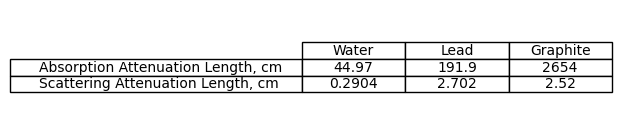

In [8]:
# Analysis for water is already completed previously in section 2.3

# Define values for lead
sigma_ab_l = 0.158 * barn # Absorption cross-section, m^2
sigma_sc_l = 11.221 * barn # Scattering cross-section, m^2
rho_l = 11.35 * 1e3 # Density, kg/m^3
M_m_l = 207.2 * 1e-3 # Molar mass of lead, kg/mol

# Find the absorption and scattering mean free path for lead
lambda_ab_l = find_mean_free_path(sigma_ab_l, rho_l, M_m_l)
lambda_sc_l = find_mean_free_path(sigma_sc_l, rho_l, M_m_l)

# Define values for graphite
sigma_ab_g = 0.0045 * barn # Absorption cross-section, m^2
sigma_sc_g = 4.74 * barn # Scattering cross-section, m^2
rho_g = 1.67 * 1e3 # Density, kg/m^3
M_m_g = 12.011 * 1e-3 # Molar mass of graphite, kg/mol

# Find the absorption and scattering mean free path for graphite
lambda_ab_g = find_mean_free_path(sigma_ab_g, rho_g, M_m_g)
lambda_sc_g = find_mean_free_path(sigma_sc_g, rho_g, M_m_g)

# Sets column and row labels for a table to display the data, and places all mean free paths in a data set
column_labels = ['Water', 'Lead', 'Graphite']
row_labels = ['Absorption Attenuation Length, cm', 'Scattering Attenuation Length, cm']
cell_data = [[f'{lambda_ab_w*100:.4g}', f'{lambda_ab_l*100:.4g}', f'{lambda_ab_g*100:.4g}'],\
             [f'{lambda_sc_w*100:.4g}', f'{lambda_sc_l*100:.4g}', f'{lambda_sc_g*100:.4g}']]

# Creates a figure to plot the table onto
fig, ax = plt.subplots(figsize = (4, 1.5))

# Plots the table
ax.table(cellText = cell_data, rowLabels = row_labels, colLabels = column_labels, loc = 'center', cellLoc = 'center')

# Switches off the superfluous axis on the table
ax.axis('off');

<div class="alert alert-block alert-info">
<h5><b>Figure 7</b></h5>
Table showing $\lambda_{sc}$ and $\lambda_{ab}$ for water, lead and graphite calculated from microscopic cross-sections $\sigma_i$ and material particle densities $n_i$.
</div>

As alluded to earlier, $\lambda_{sc}$ is much smaller than $\lambda_{ab}$ in each material (although by varying degree). This translates to a probability of each process occurring - scattering is likely to occur much before absorption, however repeated over many steps the neutron may eventually be absorbed due to the nature of the distributions.

<b> [Go Back To Contents](#Contents)

***

### 3.2 - Visualisation of Neutron Path

We now come to the mammoth task of actually simulating the neutrons travelling through the shielding layer. We will first plot the paths of $10$ neutrons travelling through each material, and then in subsequent sections complete analyses of simulations with many more neutrons.

First, let's consider the geometry of the system. We have a slab of infinite dimensions in the $y$ and $z$ axes, but finite width in $x$, $L$, which we will fix at $L = 10$cm. Outside of the slab is a vacuum (it doesn't have to be a vacuum, it could be air - however the interactions outside of the slab are not relevant for this simulation, so we can imagine it as a vacuum).

Each neutron enters the slab at position $(0, 0, 0)$ pointing in the direction of $+x$, i.e. into the slab. For each step, we check to see if the neutron is still within the confines of the slab, or if it has left it. If the neutron has an $x$ coordinate < $0$, then it has been reflected and that particular neutron's path needs to be updated no more. The same is true for a neutron whose $x$ coordinate > slab thickness, except that it has been transmitted. 

If the neutron is still within the slab, then it is either scattered or absorbed. This is where our exponential distribution comes into play - we can generate a distance at which the neutron is scattered based on $\lambda_{sc}$, and another for absorption based on $\lambda_{ab}$. Comparing the two, whichever length is smaller is which process the neutron will undergo i.e. if the generated scattering length is shorter than the generated absorption length on that step, then the neutron is scattered before it has chance to be absorbed and moves on to the next step.

These steps are repeated until all neutrons have either been reflected, transmitted or absorbed. In order to do this, we will need multiple large arrays, including one for the status of each neutron (active, absorbed, transmitted or reflected), and one holding the coordinates of each neutron at each step. After simulating all $10$ neutrons, their paths and final destinations can be plotted on a $3$D plot.

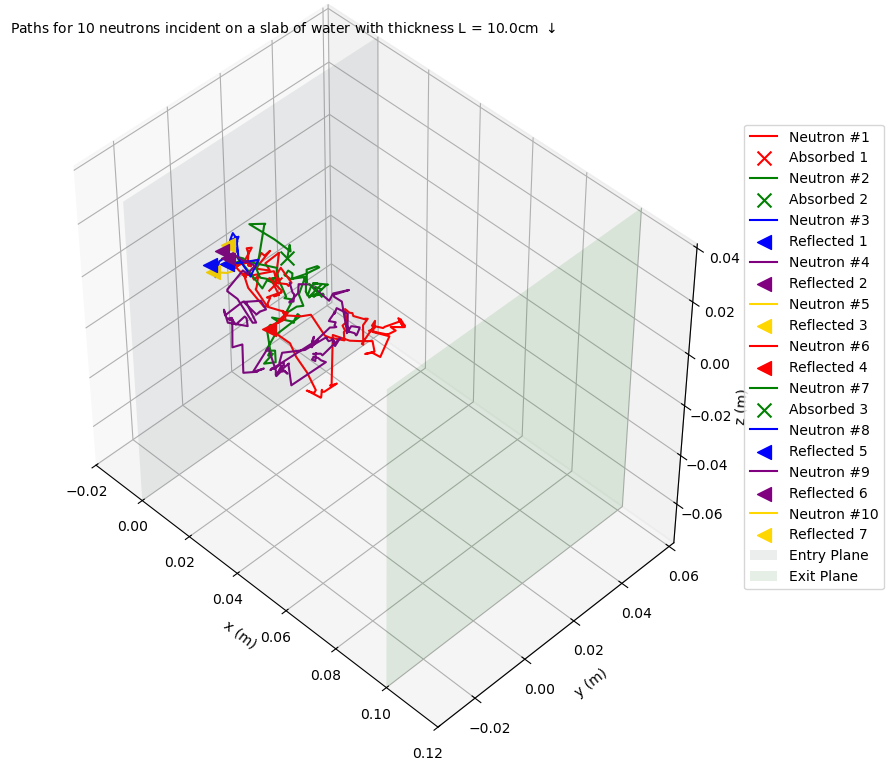

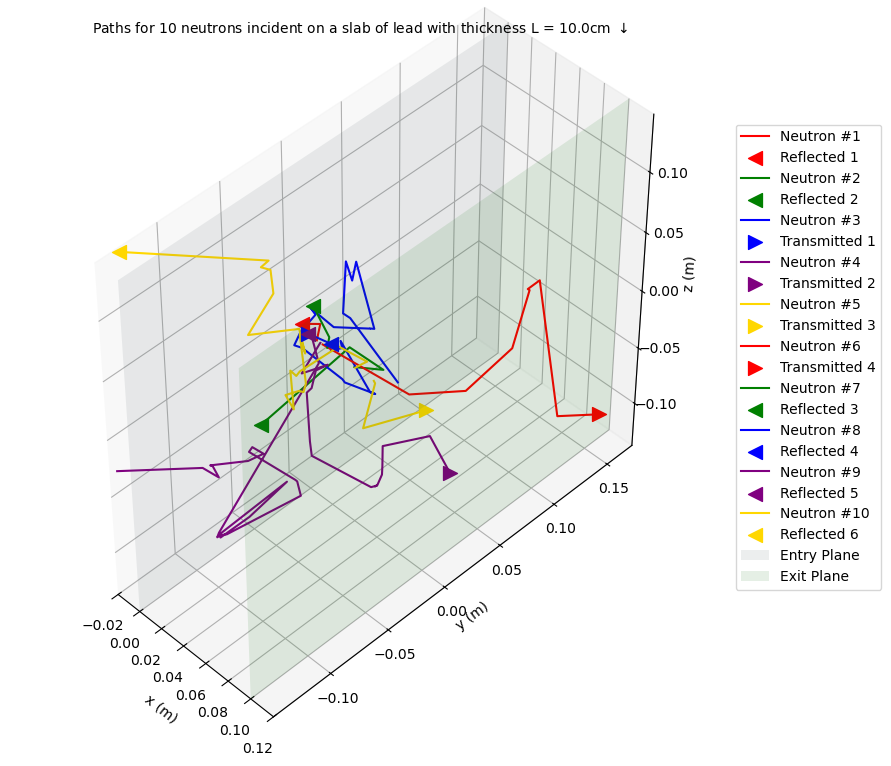

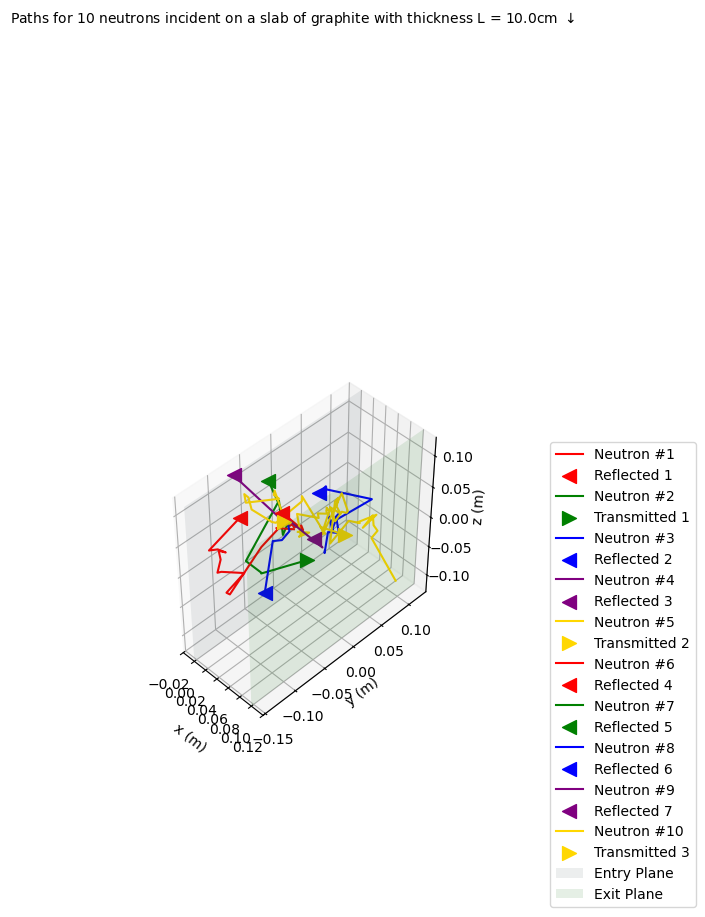

In [9]:
# Assigns each of the conditions possible with a number for ease
ABSORBED, REFLECTED, TRANSMITTED, ACTIVE = 0, 1, 2, 3

# Function to generate the random steps
def random_length(first, num_particles, mfp_sc, mfp_ab):
    '''
    Generates a random step using uniform, random distributions and checks for
    whether the particle is scattered (continues to next step) or absorbed. 

    VARIABLES
    ----------------------------
    first : BOOLEAN - distinguishes if this is the first run of the function, in
    which case there are specific entry conditions for the particle (+x direction)
    num_particles : INTEGER - number of active particles
    mfp_sc : FLOAT - mean free path of scattering, m
    mfp_ab : FLOAT - mean free path of absorption, m

    phi : ARRAY - 2pi * random distribution to represent phi direction
    theta : ARRAY - random distribution fit to an arccos formula to eliminate the
    pescky poles
    s_sc : ARRAY - size = num_particles; represents the radius, r in spherical 
    coordinates of a random scatter
    s_ab : ARRAY - same as above but for absorption (usually larger than scattering)
    scattered_mask : BOOLEAN - a masking condition that is true when s_sc < s_ab, i.e
    true when particle is scattered before it can be absorbed
    s : ARRAY - when scattered_mask is true, s represents the radius of travel for
    scattered particle
    x, y, z : ARRAY - x, y and z movements transferred from spherical polar
    coordinates into 3D cartesian for particular step for each particle

    RETURNS
    ----------------------------
    np.array([x, y, z]) : ARRAY - step in each direction for each particle
    scattered_mask : BOOLEAN - as above
    
    '''

    # Checks if it is the first iteration or not
    if first:
        # Sets phi and theta as to make particle travel in +x direction
        phi = np.zeros(num_particles)
        theta = np.full(num_particles, np.pi / 2)
        
    else:
        # Phi and theta randomly generated if it is not the first iteration
        phi = np.random.uniform(0, 2 * np.pi, size = num_particles)
        theta = np.arccos(1 - 2 * np.random.uniform(size = num_particles))

    # Generates both scattering and absorption radii, this is EGS style sampling
    s_sc = -mfp_sc * np.log(np.random.uniform(size=num_particles))
    s_ab = -mfp_ab * np.log(np.random.uniform(size=num_particles))

    # Creates a mask condition for scattering and sets a new array s as s_sc only
    #  where particle is scattered and 0 where particle is absorbed
    scattered_mask = s_sc < s_ab
    s = np.where(scattered_mask, s_sc, 0)

    # Creates x, y and z components of movement from generated phi and theta
    x = s * np.sin(theta) * np.cos(phi)
    y = s * np.sin(theta) * np.sin(phi)
    z = s * np.cos(theta)

    return np.array([x, y, z]), scattered_mask

# Function to actually run our simulation
def run_simulation(num_particles, max_steps, slab_thickness, mfp_sc, mfp_ab, track_paths=False):
    '''
    Moves our neutrons step by step and checks if they have been absorbed, reflected
    or transmitted

    VARIABLES
    ----------------------------
    num_particles : INTEGER - number of neutrons
    max_steps : INTEGER - an arbitrary limit on how many steps our neutrons can take. 10000
    has been chosen as neutrons will extremely rarely exceed this many scatters before
    they reach reflection, transmission or absorption
    slab_thickness : FLOAT - thickness of our slab, m
    mfp_sc : FLOAT - mean free path of scattering, m
    mfp_ab : FLOAT - mean free path of absorption, m
    track_paths : BOOLEAN - for visualisation we track the paths in order to plot them
    however for the main analysis to reduce computation cost we will not track paths of
    each neutron for optimal speed

    pos : ARRAY - an array that is updated every step with the cumulative position of each
    particle with x y and z coordinates
    status : ARRAY - keeps track of the status of each neutron, initially filled with
    ACTIVE however will update as neutrons move and are absorbed, reflected or
    transmitted
    absorbed_step : ARRAY - filled with '-1' as a placeholder unless the particle is
    absorbed on that step; keeps track of when a neutron is absorbed
    coords : ARRAY - large array that keeps track of the neutron histories and coordinates
    with every step
    exit_step : ARRAY - similar to absorbed_step except tracks at which step the neutron
    has left the slab through transmission or reflection
    disp : ARRAY - holds x, y and z coordinates of a particular step (temporary)
    active : ARRAY - used to check whether there are any active neutrons left as to shorten
    the runtime if all available particles have terminated 
    active_indices : ARRAY - positions of all active particles so we know which to move
    n_active : INTEGER - number of active particles
    new_x : ARRAY - just the x positions of active particles to check for reflection or
    transmission
    transmitted : BOOLEAN - condition for transmission, true when neutron is transmitted
    i.e beyond x = slab_thickness
    reflected : BOOLEAN - condition for reflection, true when neutron is reflected i.e
    x < 0
    still_in_slab : BOOLEAN - condition for particle still within slab, true when
    particle is still within the slab i.e when particle is not transmitted or reflected
    transmitted_ids : ARRAY - new array of positions within active_indices that have been
    transmitted
    reflected_ids : ARRAY - new array of positions within active_indices that have been
    reflected
    remaining_ids : ARRAY - new array of positions within active_indices that are still
    remaining after transmission and reflection conditions have been checked
    remaining_disp : ARRAY - subsection of disp array that have not been transmitted or
    reflected
    remaining_mask : ARRAY - subsection of scattering_mask that have not been
    transmitted or reflected
    absorbed : BOOLEAN - condition for a neutron to be absorbed
    scattered : BOOLEAN - condition for a neutron to be scattered
    absorbed_ids : ARRAY - positions within remaining_ids where neutron is absorbed
    scattered_ids : ARRAY - positions within remaining_ids where neutron is scattered i.e
    not absorbed, transmitted or reflected

    RETURNS
    ----------------------------
    coords, absorbed_step, status, exit_step as above
    
    '''

    # ==== Define some arrays we will need ====
    # Array that will hold latest x, y and z coordinates for updating main coords
    pos = np.zeros((3, num_particles))

    # Status of each particle starts as active; updated as we iterate
    status = np.full(num_particles, ACTIVE, dtype = np.int8)

    # Set an array full of -1 to start with - for each particle this will be updated
    # if it is absorbed with its step (not equal to -1)
    absorbed_step = np.full(num_particles, -1)

    # If we want to record the tracks of particles (which for plotting we do) then
    # we track the particle's history, for large numbers of particles in later sections
    # we don't want the histories as they aren't important for the porbabilities
    coords = np.zeros((3, num_particles, max_steps)) if track_paths else None

    # As well as recording when the particle is absorbed we will want to where it
    # leaves the slab if it is transmitted or reflected
    exit_step = np.full(num_particles, -1)

    # ==========================================

    # Initial step with particles all travelling in +x direction
    disp, scatter_mask = random_length(True, num_particles, mfp_sc, mfp_ab)

    # Update pos array (current coordinates of all particles) with displacement of
    # current step
    pos += disp

    # If we are tracking coordinates (for plotting) then we want to record first step
    # in particle history, later we won't need this really
    if track_paths:
        coords[:, :, 0] = pos

    # Now we need to perform all steps (arbitrary max steps as explained in docstring)
    for step in range(1, max_steps):

        # Check if there are any 'active' particles i.e any particles that have not been
        # absorbed, reflected or transmitted. Breaks loop if all particles have terminated
        active = status == ACTIVE
        if not np.any(active):
            break

        # Finds the positions of active particles and hence the number of active
        # particles left after each step
        active_indices = np.where(active)[0]
        n_active = len(active_indices)

        # Generates movement for this step
        disp, scatter_mask = random_length(False, n_active, mfp_sc, mfp_ab)

        # Specifically takes x axis values so that we can check whether the particle is
        # still in the slab
        new_x = pos[0, active] + disp[0]

        # ==== Defining conditions for transmission, reflection or still in the slab ====
        # Transmission condition when x > slab_thickness
        transmitted = new_x > slab_thickness

        # Reflection condition when x < 0
        reflected = new_x < 0

        # Still in slab means our particle is NOT transmitted OR reflected
        still_in_slab = ~(transmitted | reflected)

        # ===============================================================================

        # Finds the positions of any particles that have been reflected or
        # transmitted
        transmitted_ids = active_indices[transmitted]
        reflected_ids = active_indices[reflected]

        # Updates positions of reflected and transmitted particles
        pos[:, reflected_ids] += disp[:, reflected]
        pos[:, transmitted_ids] += disp[:, transmitted]

        # Updates the status of reflected and transmitted particles so that
        # they are no longer active (and can be counted later)
        status[active_indices[transmitted]] = TRANSMITTED
        status[active_indices[reflected]] = REFLECTED

        # Updates the exit step of any transmitted or reflected particles
        exit_step[transmitted_ids] = step
        exit_step[reflected_ids] = step

        # Now we deal with particles that have not been transmitted or reflected
        # by logging thier positions and creating some new arrays for their
        # displacement and mask
        remaining_ids = active_indices[still_in_slab]
        remaining_disp = disp[:, still_in_slab]
        remaining_mask = scatter_mask[still_in_slab]

        # Conditions for absorption or continued scattering i.e absorbed if particle
        # is not remaining but has not been designated as transmitted or reflected
        absorbed = ~remaining_mask
        scattered = remaining_mask

        # Find positions of absorption, update status as before and also add the step
        # as the absorption step for any absorbed particles
        absorbed_ids = remaining_ids[absorbed]
        status[absorbed_ids] = ABSORBED
        absorbed_step[absorbed_ids] = step

        # Any remaining particles that haven't been absorbed, transmitted or reflected
        # can now be designated to be re scattered in the next step
        scattered_ids = remaining_ids[scattered]
        pos[:, scattered_ids] += remaining_disp[:, scattered]

        # Tracks particle history (only for the 3d plots as we will not track the
        # particle histories for the large simulations we will perform in later
        # sections) by updating the coords array for this step
        if track_paths:
            coords[:, :, step] = coords[:, :, step - 1] #  For particles that haven't moved
            coords[:, scattered_ids, step] = pos[:, scattered_ids] # For scattered particles
            coords[:, active_indices[transmitted], step] = pos[:, active_indices[transmitted]] # For transmitted particles
            coords[:, active_indices[reflected], step] = pos[:, active_indices[reflected]] # For reflected particles
            coords[:, absorbed_ids, step] = pos[:, absorbed_ids] # For absorbed particles

    return coords, absorbed_step, status, exit_step


# Plotting function for the 3D neutron paths through the slab
def neutron_path_plotter(mfp_sc, mfp_ab, material):
    '''
    Plots a 3D graph to show neutron paths as they are scattered through a material, and 
    whether they absorb, reflect or transmit.

    VARIABLES
    --------------------
    mfp_sc : FLOAT - mean free path of scattering for a material
    mfp_ab : FLOAT - mean free path of absorption for a material
    material : STRING - name of material
    coords : ARRAY - logged paths of the neutrons
    absorbed_step : ARRAY - position that absorbed particles are absorbed
    status : ARRAY - status of each particle, e.g absorbed, reflected etc
    exit_step : ARRAY - step that reflected/transmitted neutrons exit the slab
    colours : ARRAY - colours for plotting clarity
    ab, ref, tran : INTEGER - number of absorbed, reflected and transmitted neutrons
    end_step : INTEGER - step in which the particle reaches a conclusion
    x/y/z_path : ARRAY - paths of each neutron in x, y and z directions
    x/y/z_end : FLOAT - coordinates in each axis of the final step for a neutron
    x/y/zmin/max : FLOAT - min and max of each axis, based on neutron path limits
    Y, Z - ARRAY - mesh grid of y and z axis
    X0 : ARRAY - mesh grid full of zeros to represent x = 0 plane
    X1 : ARRAY - mesh grid full of x = slab_thickness to repesent x = slab thickness plane
    slab_thickness : FLOAT - thickness of the slab, m
    num_particles : INTEGERS - number of neutrons to be simulated
    max_steps : INTEGER - maximum number of steps that a neutron can take during the simulation
    mfp_values : ARRAY - holds material name, and mean free path of scattering and absorption
    for that material
    
    '''
    
    # Calls the simulation
    coords, absorbed_step, status, exit_step = run_simulation(num_particles, max_steps, slab_thickness, \
                                                              mfp_sc, mfp_ab, track_paths=True)
    # Creates figure and projects it to 3D
    fig = plt.figure(figsize = (10, 7.5))
    ax = fig.add_subplot(111, projection = '3d')
    
    # Setting some colours to increase clarity of plot
    colours = ['red', 'green', 'blue', 'purple', 'gold']
    
    # Defining three variables to count how many particles are absorbed, transmitted and reflected
    ab = ref = tran = 0
    
    # For loop goes over each particle and plots its path, and end point
    for p in range(num_particles):
        # Determines the path length for each particle; stops at absorption, transmission or
        # reflection, whichever is first
        if absorbed_step[p] != -1:
            end_step = absorbed_step[p]
            
        elif exit_step[p] != -1:
            end_step = exit_step[p] + 1
    
        # Unlikley for any particle to reach max steps but in case it does we give it an end step
        else:
            end_step = max_steps - 1

        # No matter the outcome the particle's path is found, leading up to and including its termination
        x_path = coords[0, p, :end_step]
        y_path = coords[1, p, :end_step]
        z_path = coords[2, p, :end_step]

        # Plots the line path of the particle by joining the dots between each step's coordinates
        ax.plot(x_path, y_path, z_path, label = f'Neutron #{p+1}', color = colours[p % len(colours)])

        # Sets the end coordinates for x, y and z for a particle
        x_end, y_end, z_end = coords[:, p, end_step]

        # Uses the final status of a particle in order to plot it correctly, i.e a particle that has been
        # absorbed will be plotted with an x marker, transmission will be plotted with a > marker and
        # reflection with a < marker for clarity - also adds 1 to the absorption, transmission or reflection
        # count depending on status
        if status[p] == 0:
            ab += 1
            ax.scatter(x_end, y_end, z_end, color = colours[p % len(colours)], marker = 'x', s = 100, label = f'Absorbed {ab}')
            
        elif status[p] == 2:
            tran += 1
            ax.scatter(x_end, y_end, z_end, color = colours[p % len(colours)], marker='>', s = 100, label = f'Transmitted {tran}')
            
        elif status[p] == 1:
            ref += 1
            ax.scatter(x_end, y_end, z_end, color = colours[p % len(colours)], marker = '<', s = 100, label = f'Reflected {ref}')
    
    # Defining the bounds of the slab face in x, y and z
    xmin, xmax = -0.02, slab_thickness + 0.02
    ymin, ymax = np.min(coords[1, :, :]) - 0.02, np.max(coords[1, :, :]) + 0.02
    zmin, zmax = np.min(coords[2, :, :]) - 0.02, np.max(coords[2, :, :]) + 0.02
    
    # Sets axis limits for each plot
    ax.set(xlim = (xmin, xmax), ylim = (ymin, ymax), zlim = (zmin, zmax))
    
    # Create a meshgrid for the y-z plane for the 2D entry and exit planes
    Y, Z = np.meshgrid(np.linspace(ymin, ymax, 2), np.linspace(zmin, zmax, 2))
    
    # x = 0 entry to slab plane
    X0 = np.zeros_like(Y)
    ax.plot_surface(X0, Y, Z, alpha = 0.1, color = 'lightblue', edgecolor = 'none', label = 'Entry Plane')
    
    # x = slab_thickness plane exit from slab plane
    X1 = np.ones_like(Y) * slab_thickness
    ax.plot_surface(X1, Y, Z, alpha = 0.1, color = 'lime', edgecolor = 'none', label = 'Exit Plane')

    # Axis labels
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')

    # Sets legend and puts it to the right of the main plot for formatting
    ax.legend(bbox_to_anchor = (1.22, 0.85))

    # Fixes the view of the 3D plot for maximum visibility in each axis
    ax.view_init(45, -45)

    # Gives the 3D plot a proprtional aspect ratio, so the sides don't look distorted and 1 unit in one
    # direction is the same in all directions so movement is to scale in all directions
    ax.set_box_aspect([ub - lb for lb, ub in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
    
    # Caption at the top of the figure (although  depending on the size of the 3D plot it doesn't
    # always plot correctly) to give the number of particles, the material and the slab thickness in cm
    fig.text(0.4, 0.95, f'Paths for {num_particles} neutrons incident on a' \
    rf' slab of {material} with thickness L = {slab_thickness*100}cm $\downarrow$', ha = 'center')

    # My attempt to bring the 3D plots closer together
    plt.tight_layout()


# Sets parameters for this plot - only 10 particles for the plot at first, then we will have more particles
# when we re-call the function later
slab_thickness = 0.1
num_particles = 10
max_steps = 10000

# Sets an array with the information for each material (its mean free path of scattering and absorption)
# that we can easily loop through
mfp_values = [[lambda_sc_w, lambda_ab_w, 'water'], [lambda_sc_l, lambda_ab_l, 'lead'], [lambda_sc_g, lambda_ab_g, 'graphite']]

# Calls the plotter (which calls the simulation) for each material
for i in mfp_values:
    neutron_path_plotter(i[0], i[1], i[2])

<div class="alert alert-block alert-info">
<h5><b>Figure 8</b></h5>
$3$D plots to show the paths of 10 neutrons travelling through a slab of water (top), lead (centre) and graphite (bottom) of thickness 10cm.
</div>

As is clear upon studying the movements of the neutrons through each material, the interactions in each material are not the same. In water (for a slab of 10cm), for example, most of the neutrons are reflected quickly (<b>backscattered</b>), with a few absorptions. Transmission is very rare. For lead, however, while reflection is still the most common outcome, transmission is much more common than it is for water, with absorption the least likely option. For graphite, reflection is the most common outcome yet again, with transmission slightly more common than it was for lead. Absorption in graphite is unlikely at this slab width.

From this visualisation alone, we can see that water acts as the best shielding layer out of the three materials, i.e. it prevents the most neutrons from transmitting through it.

<b> [Go Back To Contents](#Contents)

***

## 3.3 - Quantification of Neutron Scattering

Whilst we can qualitatively judge the approximate levels of absorption, reflection and transmission for each material from the visualisation above, we need to run the simulation with a much larger number of neutrons, and run it multiple times in order to quantify the rates of absorption, reflection and transmission to a high degree of accuracy. 

We will now use $10,000$ neutrons, and run the simulation $10$ times for each material in order to calculate mean rates of absorption, reflection and transmission and then find the standard deviation of each, which is a good proxy for the error in each value. This means there will be $30$ total runs, with an output 'report' for each run printed. 

The rate of absorption, reflection and transmission can be calculated by counting how many neutrons underwent each process, which we could label $N_A$, $N_R$ and $N_T$. We can find the total number of neutrons, $N$, by $N = N_A + N_R + N_R$ (which we hope to be $10,000$), and hence we can find the fraction of $N$ that have undertaken each process i.e absorption rate, $A=\frac{N_A}{N}$. The uncertainty in $N_A$ (or any other process for that matter) is easily found because we have completed $10$ runs of the simulation - we can simply take the standard deviation and use it as a proxy for the error. 

====| Fixed Slab Thickness = 10.0cm |====

=============| Water | =============

====| Run #1 for Water |====
Total neutrons: 10000
Neutrons absorbed: 2074
Neutrons reflected: 7896
Neutrons transmitted: 30
Transmission Rate: 0.30%

====| Run #2 for Water |====
Total neutrons: 10000
Neutrons absorbed: 2002
Neutrons reflected: 7967
Neutrons transmitted: 31
Transmission Rate: 0.31%

====| Run #3 for Water |====
Total neutrons: 10000
Neutrons absorbed: 1993
Neutrons reflected: 7981
Neutrons transmitted: 26
Transmission Rate: 0.26%

====| Run #4 for Water |====
Total neutrons: 10000
Neutrons absorbed: 2008
Neutrons reflected: 7958
Neutrons transmitted: 34
Transmission Rate: 0.34%

====| Run #5 for Water |====
Total neutrons: 10000
Neutrons absorbed: 2007
Neutrons reflected: 7967
Neutrons transmitted: 26
Transmission Rate: 0.26%

====| Run #6 for Water |====
Total neutrons: 10000
Neutrons absorbed: 2053
Neutrons reflected: 7914
Neutrons transmitted: 33
Transmission Rate: 0.33%

====| Run #7 

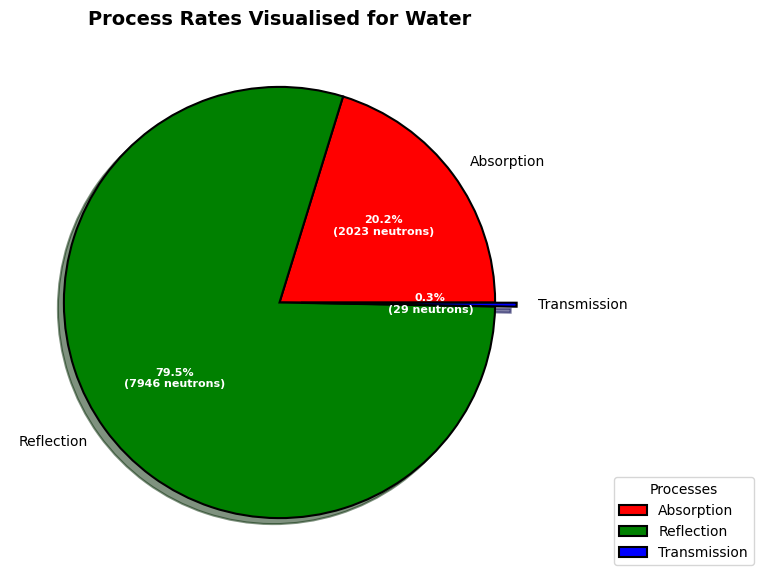

=============| Lead | =============

====| Run #1 for Lead |====
Total neutrons: 10000
Neutrons absorbed: 983
Neutrons reflected: 6257
Neutrons transmitted: 2760
Transmission Rate: 27.60%

====| Run #2 for Lead |====
Total neutrons: 10000
Neutrons absorbed: 975
Neutrons reflected: 6148
Neutrons transmitted: 2877
Transmission Rate: 28.77%

====| Run #3 for Lead |====
Total neutrons: 10000
Neutrons absorbed: 997
Neutrons reflected: 6205
Neutrons transmitted: 2798
Transmission Rate: 27.98%

====| Run #4 for Lead |====
Total neutrons: 10000
Neutrons absorbed: 973
Neutrons reflected: 6209
Neutrons transmitted: 2818
Transmission Rate: 28.18%

====| Run #5 for Lead |====
Total neutrons: 10000
Neutrons absorbed: 952
Neutrons reflected: 6287
Neutrons transmitted: 2761
Transmission Rate: 27.61%

====| Run #6 for Lead |====
Total neutrons: 10000
Neutrons absorbed: 982
Neutrons reflected: 6189
Neutrons transmitted: 2829
Transmission Rate: 28.29%

====| Run #7 for Lead |====
Total neutrons: 10000
N

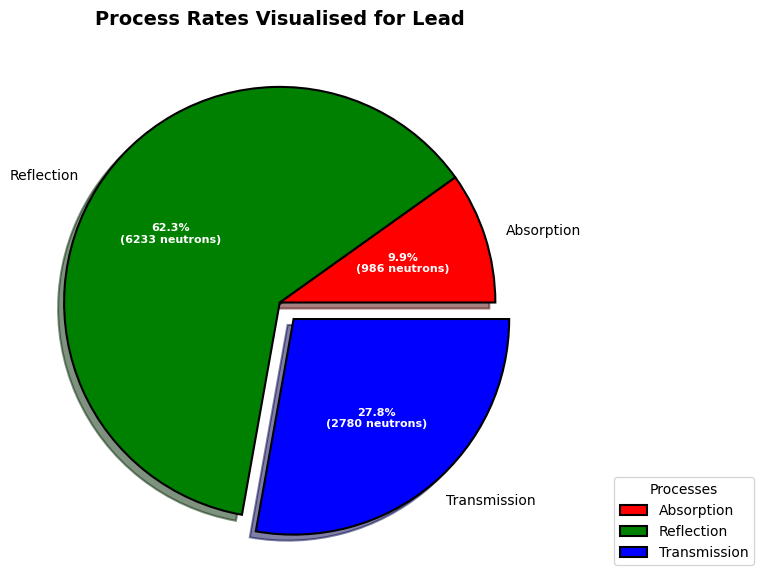

=============| Graphite | =============

====| Run #1 for Graphite |====
Total neutrons: 10000
Neutrons absorbed: 76
Neutrons reflected: 6850
Neutrons transmitted: 3074
Transmission Rate: 30.74%

====| Run #2 for Graphite |====
Total neutrons: 10000
Neutrons absorbed: 83
Neutrons reflected: 6871
Neutrons transmitted: 3046
Transmission Rate: 30.46%

====| Run #3 for Graphite |====
Total neutrons: 10000
Neutrons absorbed: 71
Neutrons reflected: 6892
Neutrons transmitted: 3037
Transmission Rate: 30.37%

====| Run #4 for Graphite |====
Total neutrons: 10000
Neutrons absorbed: 78
Neutrons reflected: 6831
Neutrons transmitted: 3091
Transmission Rate: 30.91%

====| Run #5 for Graphite |====
Total neutrons: 10000
Neutrons absorbed: 87
Neutrons reflected: 6943
Neutrons transmitted: 2970
Transmission Rate: 29.70%

====| Run #6 for Graphite |====
Total neutrons: 10000
Neutrons absorbed: 76
Neutrons reflected: 6851
Neutrons transmitted: 3073
Transmission Rate: 30.73%

====| Run #7 for Graphite |==

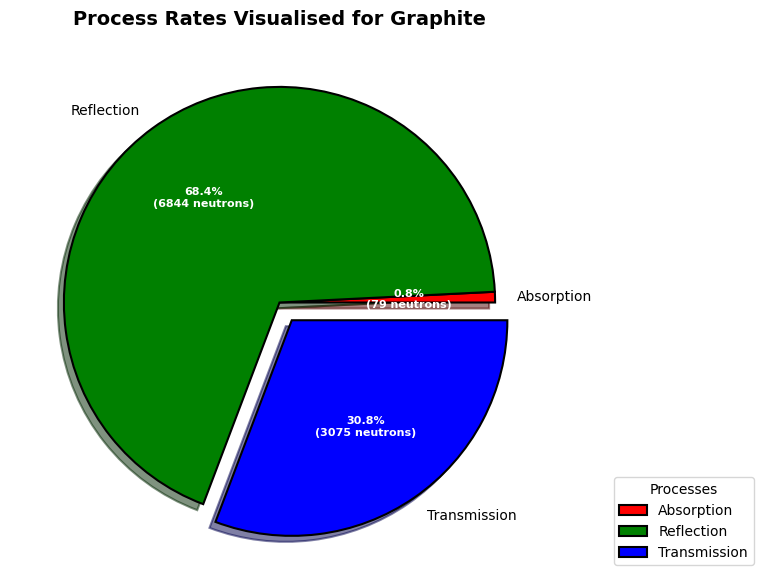

In [10]:
# Defines a few parameters that we will set for the simulation - 10000 particles for a decent
# sample size, max steps 10000 as before, 10 iterations (repeats of the simulation so that we
# can take a mean and standard deviation)
num_particles = 10000
max_steps = 10000
slab_thickness = 0.1 # m
iterations = 10

# Prints the slab thickness to re-iterate that this cell only simulates the materials for a slab
# thickness of 10cm
print(f'====| Fixed Slab Thickness = {slab_thickness*100:.1f}cm |====')
print()

# Now we  will run the simulation - the looping variable i here is for each material, and j is for
# each iteration (repeat of the system)
for i in range(len(mfp_values)):

    # An array to hold our probabilities for each process, and for each iteration
    probs = np.zeros((3, iterations))

    # Looping over each iteration
    for j in range(iterations):

        # Runs the simulation
        coords, absorbed_step, status, exit_step = run_simulation(num_particles, max_steps, slab_thickness, \
                                                                      mfp_values[i][0], mfp_values[i][1], track_paths=False)
        # After the simulation we count how many particles were absorbed, reflected or transmitted
        # by counting from the status array
        ab = np.count_nonzero(status == ABSORBED)
        ref = np.count_nonzero(status == REFLECTED)
        tran = np.count_nonzero(status == TRANSMITTED)

        # Calculates the probabilities from the total number of neutrons in each process
        total = ab + ref + tran
        absorption_prob = ab / total
        reflection_prob = ref / total
        transmission_prob = tran / total

        # Updates the probabilities array with these values
        probs[:, j] = absorption_prob, reflection_prob, transmission_prob

        # On the first iteration of each material, plot a title to distinguish each material
        if j == 0:
            print(f'=============| {mfp_values[i][2].capitalize()} | =============')
            print()

        # For each run we produce a summary with the run number, what material the run was for,
        # the number of neutrons absorbed, reflected or transmitted and the transmission rate
        print(f'====| Run #{j+1} for {mfp_values[i][2].capitalize()} |====')
        print(f'Total neutrons: {ab + ref + tran}')
        print(f'Neutrons absorbed: {ab}')
        print(f'Neutrons reflected: {ref}')
        print(f'Neutrons transmitted: {tran}')
        print(f'Transmission Rate: {transmission_prob*100:.2f}%')
        print()

    # After all 10 iterations have been performed for a material, the average absorption,
    # reflection and transmission rates are calculated and the standard deviation may be found
    mean = np.mean(probs, axis = 1)
    std = np.std(probs, axis = 1)

    # Now we can plot the overall information in a pie chart for visualisation
    categ = ['Absorption', 'Reflection', 'Transmission']
    
    categ_data = mean

    # We want transmission rates to be extra visible
    explode = (0, 0, 0.1)

    def func(pct):
        '''
        Finds the number of neutrons in each process from percentage again, and formats it
        '''
        absolute = int((pct / 100)* 10000)
        return "{:.1f}%\n({:d} neutrons)".format(pct, absolute)

    # Creates figure to plot the pie chart on
    fig, ax = plt.subplots(figsize = (10, 7))

    # Plots and formats pie chart
    wedges, texts, autotexts = ax.pie(categ_data, autopct = lambda pct: func(pct), explode = explode, labels = categ, shadow = True, \
                                      colors = ('red', 'green', 'blue'), wedgeprops = {'linewidth': 1.5, 'edgecolor': "black"}, \
                                      textprops = dict(color = ('black')))
    
    # Adding legend and title, and formatting details on pie chart
    ax.legend(wedges, categ, title = "Processes", loc = "lower center", bbox_to_anchor = (1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight = "bold", color = 'white')
    
    ax.set_title(f"Process Rates Visualised for {mfp_values[i][2].capitalize()}", weight = 'bold', fontsize = 14)
    
    # show pie chart
    plt.show()


(<b>Neutron totals on pie charts may not add up to 10000 due to rounding</b>) We can now confirm the observations we made in the previous section from the $3$D plots, but now quantitatively. 

<b> [Go Back To Contents](#Contents)

***

## 3.4 - Variable Slab Thickness

What we have shown so far are only the rates of absorption, reflection and transmission for neutrons incident on a 10cm thick slab of each material. However, it is unreasonable to think that these values would not change as we vary the thickness of the slab. We would expect by common sense that as the thickness of a material increases, the likelihood of transmission will decrease, as the neutron has more distance to travel during which it could be absorbed more easily. As a consequence, we would also expect absorption rates to increase with slab thickness. What about reflection rates? That is much harder to think about intuitively, which is why we must run our simulations again, but this time, for many different slab thicknesses. 

In the last cell we ran the simulation $30$ times, however with $10$ different slab thicknesses, we will now run it $300$ times in total (10 runs for each material for each slab width), so we will not show an output for each individual run. We will instead plot three graphs, one for each material, showing (with errors) how the absorption, reflection and transmission rates vary with slab thickness. 

Running simulations: 100%|██████████| 300/300 [00:23<00:00, 13.03it/s]


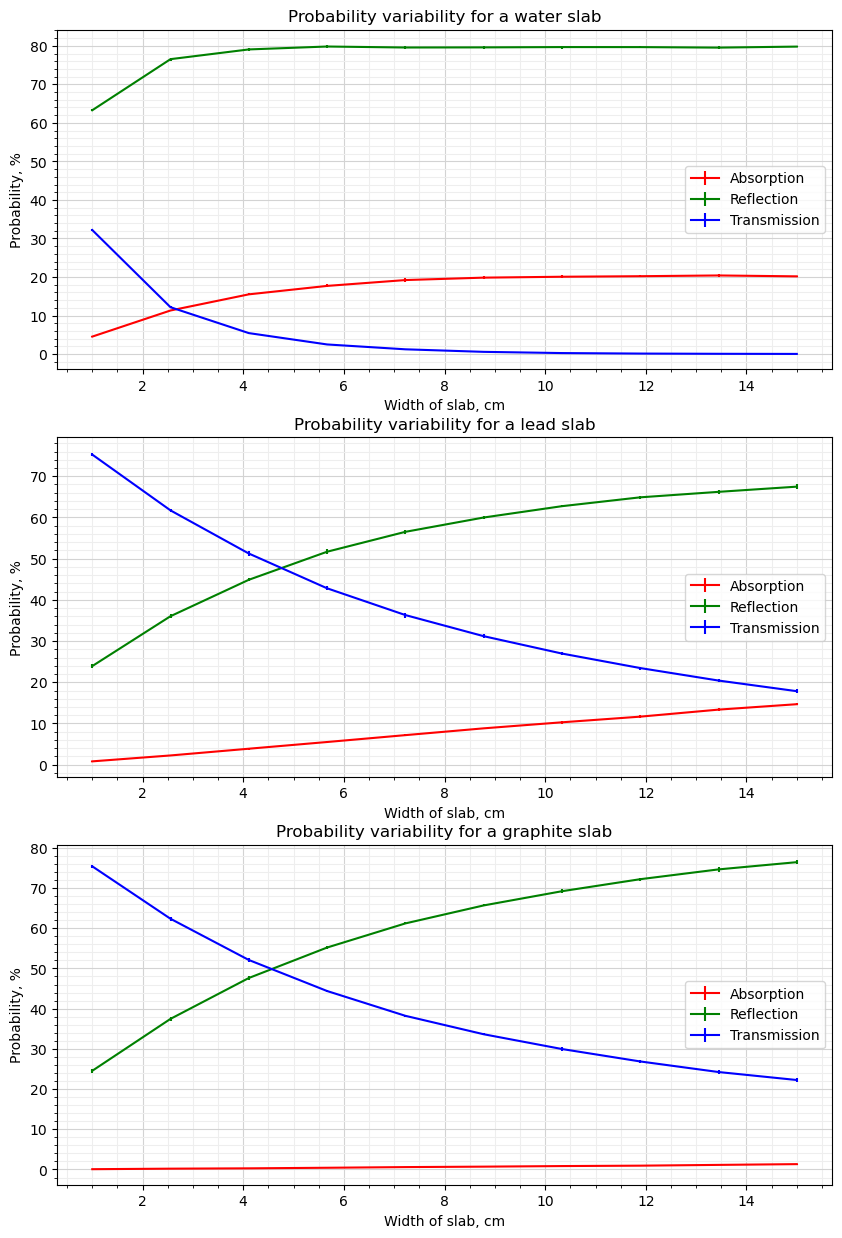

In [11]:
# Same variables as previously, except slab thickness is now an array with 10, evenly spaced
# values for plotting the variability in transmission, reflection and absorption rates
slab_thicknesses = np.linspace(0.01, 0.15, 10) # m


# Arrays defined as (slab thickness, material, ab/ref/tran); one for mean probabilities,
# one for standard deviation of those probabilities which acts as an estimate for the error
total_mean_probs = np.zeros((len(slab_thicknesses), 3, 3))
total_std_probs = np.zeros((len(slab_thicknesses), 3, 3))

# Create a progress bar to see the speed at which this process operates
total_runs = len(slab_thicknesses) * len(mfp_values) * iterations
pbar = tqdm(total=total_runs, desc = "Running simulations", dynamic_ncols = True, smoothing = 0.3)

# 10 iterations for each material for each slab thickness - simulation will run 300 times
# in total
for m in range(len(slab_thicknesses)):
    
    for i in range(len(mfp_values)):

        # As before we have a temporary array to hold the probabilities of one material for
        # all its iterations for a particular slab thickness
        probs = np.zeros((3, iterations))

        # Loop over each iteration of the simulation
        for j in range(iterations):

            # Calls the simulation
            coords, absorbed_step, status, exit_step = run_simulation(num_particles, max_steps, slab_thicknesses[m], \
                                                                      mfp_values[i][0], mfp_values[i][1], track_paths=False)

            # As before using the status array we count how many neutrons have been absorbed,
            # reflected and transmitted
            ab = np.count_nonzero(status == ABSORBED)
            ref = np.count_nonzero(status == REFLECTED)
            tran = np.count_nonzero(status == TRANSMITTED)

            # Calculate the rates of each process, and total neutrons that have reached a conclusion
            total = ab + ref + tran
            absorption_prob = ab / total
            reflection_prob = ref / total
            transmission_prob = tran / total

            # Update temporary probs array with these rates
            probs[:, j] = absorption_prob, reflection_prob, transmission_prob

            # Update progress bar with a run complete
            pbar.update(1)

        # Finds the mean of the probabilities after the 10 iterations have been performed for a material
        # for a particular slab thickness, and the standard deviation to act as a proxy for error
        mean_probs = np.mean(probs, axis = 1)
        std_probs = np.std(probs, axis = 1)

        # Updates the array holding the mean rates and standard deviations for this set of iterations
        total_mean_probs[m, i, :] = mean_probs
        total_std_probs[m, i, :] = std_probs


# Function to plot the probability variation of each process against slab thickness for each material
def plotter(y_ab, y_ref, y_tran, ab_err, ref_err, tran_err, k):
    '''
    Plots a graph of absorption, reflection and transmission probabilities for a particular
    material against slab thickness.

    VARIABLES
    ------------------------
    y_ab : ARRAY - absorption rates for each slab thickness
    y_ref : ARRAY - reflection rates for each slab thickness
    y_tran : ARRAY - transmission rates for each slab thickness
    ab_err : ARRAY - absorption error (std dev)
    ref_err : ARRAY - reflection error (std dev)
    tran_err : ARRAY - tranmission error (std dev)
    k : INTEGER - loop variable representing the material, 0 = water, 1 = lead, 2 = graphite
    
    '''

    # Plots absorption, reflection and transmission rates and error (std dev) against the
    # slab thicknesses
    axs[k].errorbar(slab_thicknesses*100, y_ab, yerr = ab_err, color = 'red', label = 'Absorption')
    axs[k].errorbar(slab_thicknesses*100, y_ref, yerr = ref_err, color = 'green', label = 'Reflection')
    axs[k].errorbar(slab_thicknesses*100, y_tran, yerr = tran_err, color = 'blue', label = 'Transmission')

    # Sets the title for each plot
    axs[k].title.set_text(f'Probability variability for a {mfp_values[k][2]} slab')

    # Sets axis labels
    axs[k].set_xlabel('Width of slab, cm')
    axs[k].set_ylabel('Probability, %')

    # Creates grid lines, major and minor
    axs[k].grid(which = 'major', color = 'lightgray')
    axs[k].grid(which = 'minor', color = '#EEEEEE')
    axs[k].minorticks_on()

    # Plots legend
    axs[k].legend(loc = 'best')

# Creates the figure with 3 vertical sections for our plots
fig, axs = plt.subplots(3, 1, figsize = (10, 15))

# Calls the plotter function for each plot on the figure (each material)
for k in range(len(axs)):
    plotter(total_mean_probs[:, k, 0] * 100, total_mean_probs[:, k, 1] * 100, total_mean_probs[:, k, 2] * 100, \
            total_std_probs[:, k, 0] * 100, total_std_probs[:, k, 1] * 100, total_std_probs[:, k, 2] * 100, k)

pbar.close()

<div class="alert alert-block alert-info">
<h5><b>Figure 9</b></h5>
Graphs of rates of absorption, reflection and transmission for water (top), lead (centre) and graphite (bottom), with error bars on each point. On the $y$-axis is probability and $x$-axis is slab width (cm).
</div>

For each material, the transmission rate decays exponentially with increasing slab thickness, though is lowest for water, with transmission at near zero beyond a thickness of 10cm. For lead and graphite, the transmission rate is very high for low slab thicknesses compared to water, indicating that water is a better neutron shield than lead or graphite. Lead also appears to be a slightly better neutron shield than graphite, which at a slab thickness of 1cm is nearly transparent to neutrons with a transmission rate of nearly $80$%.

Absorption for water increases with slab width until the transmission rate falls to near zero, at which it levels out at about $20$%. This is odd, but is likely because the rate of reflection is largely constant at larger slab thicknesses, so there is no more available particles to increase absorption rate. For lead and graphite, the absorption rates slowly linearly increase in the $1<L<15$cm range, but are much higher in lead than in graphite, which maintains an extremely low absorption rate at all studied values of $L$.

Reflection appears to increase in all materials with slab width, with the exception being water after the transmission rate falls to near zero, with the reflection rate plateauing to $~80$%. However, if larger slab thicknesses were studied it is likely the same long term plateauing trend would occur for lead and graphite, but at larger $L$ than for water.

From this, we can clearly see that the <b>most effective neutron shielding material is water </b>at all slab thicknesses studied, due to its extremly low rates of transmission. It is also the most effective absorber and reflector of the three.

<b> [Go Back To Contents](#Contents)

***

## 3.5 - Determining Attenuation Lengths and Conclusion

But how do we quantify that water is the best neutron shielding material? We have qualitatively and graphically shown this to be true, but we do yet have a quantitative metric by which to directly compare the neutron shielding ability of materials. This is where the <b> characteristic attenuation length</b> comes into play. We observed in the previous section that the transmission rates through each material fell exponentially with slab width. We can model this for any material via

\begin{equation*}
T(l) = T_0 e^{-\frac{l}{\lambda_{att}}} \tag{9}
\end{equation*}

where $T(l)$ is the transmission rate for a given slab thickness $l$ (m), $T_0$ is the transmission rate at $l = 0$cm (which we know is just 1) and $\lambda_{att}$ is the characteristic attenuation length (m) that we are trying to find. The attenuation length represents the slab width at which only 37% (or $\frac{1}{e}$) of neutrons are transmitted. We can rearrange Equation $9$ to

\begin{equation*}
\log{(T(l))} = -\frac{l}{\lambda_{att}}, \tag{10}
\end{equation*}

which is linear if we plot $\log{(T(l))}$ against $l$, with a gradient equal to $-\frac{1}{\lambda_{att}}$. If we do this for each material, we can plot this relationship and find the attenuation length.

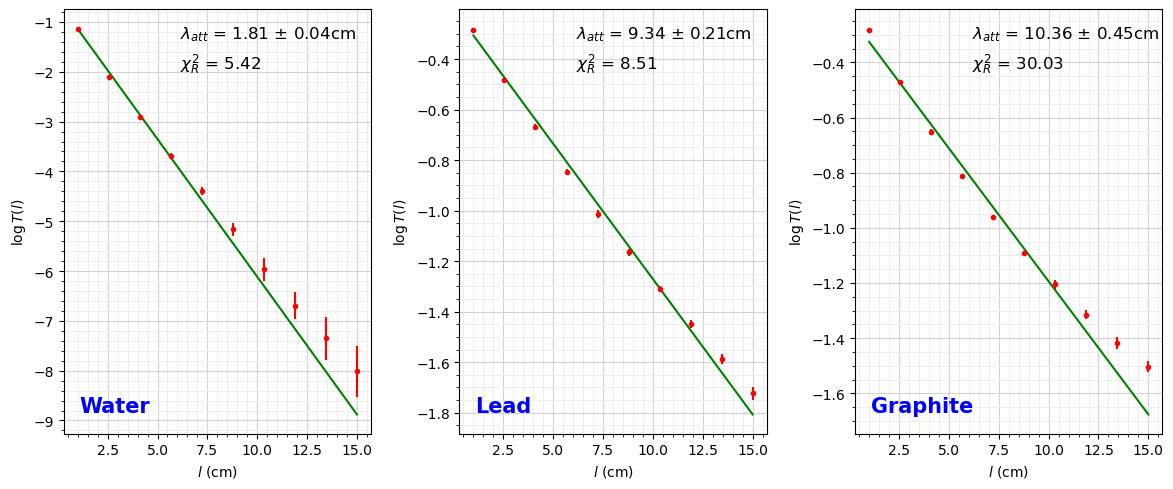

In [12]:
# Creates figure for plots
fig, axs = plt.subplots(1, 3, figsize = (12, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

# Loop over each material
for k in range(3):

    # Pick out the transmission rates from the main simulation
    trans_prob = total_mean_probs[:, k, 2]

    # We need the logarithmic error as we take the log of the transmission probabilities in the
    # polyfit below
    trans_error = total_std_probs[:, k, 2] / trans_prob

    # Performs the polyfit on the log of transmission rates against slab thickness, with
    # attenuation coefficient related to the gradient of that linear relationship
    gradient, cov = np.polyfit(slab_thicknesses, np.log(trans_prob), 1, cov = True, w = 1 / trans_error)

    # Extract attenuation length and their errors for particular material from polyfit
    att = -1 / gradient[0]
    err = np.sqrt(cov[0][0]) / gradient[0] ** 2

    # Plots the log of the transmission probability on the y axis
    axs[k].errorbar(slab_thicknesses*100, np.log(trans_prob), yerr = trans_error, color = 'red', \
                    zorder = 3, marker = 'o', markersize = 3, ls = '', label = 'Generated Data')
    
    # Plots the ideal line using the parameters provided by the polyfit
    axs[k].plot(slab_thicknesses*100, ((slab_thicknesses * gradient[0]) + gradient[1]), \
                color = 'green', zorder = 2, label = 'Model Line')

    # Chi-squared analysis
    red_chi_sq = (1 / (len(trans_prob) - 2)) * np.sum(((((slab_thicknesses * gradient[0]) + gradient[1]) \
                - (np.log(trans_prob))) ** 2) / (trans_error ** 2))
    
    # Shows material name and calculated attenuation length in cm
    axs[k].text(0.38, 0.93, rf'$\lambda_{{att}}$ = {att*100:.2f} $\pm$ {err*100:.2f}cm', transform = axs[k].transAxes, fontsize = 12)
    axs[k].text(0.05, 0.05, f'{mfp_values[k][2].capitalize()}', transform = axs[k].transAxes, color = 'blue', fontsize = 15, weight = 'bold')
    axs[k].text(0.38, 0.86, rf'$\chi_R^2$ = {red_chi_sq:.2f}', transform = axs[k].transAxes, fontsize = 12)

    # Sets axis labels
    axs[k].set_xlabel(r'$l$ (cm)')
    axs[k].set_ylabel(r'$\log{T(l)}$')

    # Sets a grid for clarity
    axs[k].grid(which = 'major', color = 'lightgray')
    axs[k].grid(which = 'minor', color = '#EEEEEE')
    axs[k].minorticks_on()

# Neatens plots
plt.tight_layout()



<div class="alert alert-block alert-info">
<h5><b>Figure 10</b></h5>
Graphs of $\log{(T(l))}$ against $l$ for water (left), lead (centre) and graphite (right), with errors, as well as the best fit line for each plotted in green.
</div>

Clearly, the attenuation length $\lambda_{att}$ for water is the smallest, coming in at just under $2$cm. This means that at a width of less than 2cm, over 63% of the neutrons incident are already prevented from achieving transmission. For lead, this comes in at around $9-10$cm, and for graphite, at about $10-11$cm (exact values generated this time are displayed in Figure 10). This shows definitively that water is the best neutron shielding material out of the three. This of course makes sense, as water (along with other materials) is often used in nuclear reactors to shield neutrons.

Attenuation lengths of neutrons also have geological uses. For example, a rock sample's water content may be determined using neutron attenuation [(Nordlund, A., 2001)](#5---References).

<b> Up to this point (end of main objectives) the code takes approximately 32 seconds to run. </b>

<b> [Go Back To Contents](#Contents)

***

## 4 - Extension - Woodcock Method

The <b>Woodcock method</b> is a convenient way for us to simulate two slabs of different material <b>in contact</b>. The problem with using the method we have already used is with the boundary - there will be a particular step where a neutron crosses from material $1$ to material $2$, in which case the step length will be invalid in material $2$, as it was generated using the parameters of material $1$. 

To get around this, we can find the largest <b>macroscopic cross-section</b>, $\Sigma_{max}$, out of the two materials, and take steps according to that in both materials. As a result, the steps in the material with a smaller $\Sigma$ (longer $\lambda_{sc}$) the steps will be too short. We can mitigate this issue by making some 'fictitous' steps. Whether or not a step is decided will be decided by a value we denote as $P = \frac{\Sigma_{current}}{\Sigma_{max}}$. We can generate a random value between $0$ and $1$ and compare it to $P$ - if the generated value < $P$, then the step will be real. Otherwise, it will be a fictitious step.

The fictitious steps continue in the same direction as the previous real step, slowly creeping toward the boundary. As usual, other processes including reflection and absorption can occur. Once the neutrons have entered material $2$ (given that material $2$ has $\Sigma_{max}$) all steps will be real and the simulation will continuue in a fashion not dissimilar to that covered in earlier sections. The net effect of fictitous steps is that they will occur often enough to effectively simulate neutron transmission, absorption and scattering in both materials, despite the same mean free paths being used.

But why bother using the Woodcock method? Why do we want to model multiple slabs of different materials together? Well, simulating one material confines us to only using a singular material for radiation shielding in a nuclear reactor (for example), which is an unreasonable constraint. Using combinations of multiple materials can allow us to find more efficient or cost effective methods of nuclear shielding than would otherwise be possible with just a single material. 

<b> Below, you can enter which material combination you would like to view the transmission rate from. On top of this, you can change the width of each material separately to experiment with which is most (or least!) effective. The default slab width is $10$cm ($0.1$m). </b>

In [13]:
# Calls function to perform woodcock method
def woodcock(num_particles, max_steps, mfp_values, material_pair, thicknesses):
    '''
    Performs a Woodcock simulation for two specified materials from a pre-specified list and allows
    customised slab lengths to be added.

    VARIABLES
    ------------------
    ABSORBED, REFLECTED, TRANSMITTED, ACTIVE : INTEGER - status of neutrons
    selected_materials : ARRAY - used to hold info about chosen materials to be simulated with
    num_particles : INTEGER - number of neutrons
    max_steps : INTEGER - number of steps that the simulation can take (10000, arbitrarily large)
    mfp_values : ARRAY - holds data of all mfp values and names of materials as a database
    material_pair : ARRAY - chosen materials
    thicknesses : ARRAY - chosen thicknesses
    current_start : FLOAT - temporary variable used to determine start and end positions of each material
    pos, status, directions : ARRAY - all used in neutron movement (pos, current position; status, 
    current status of each neutron etc)
    sigma_t_all : ARRAY - all macroscopic cross-sections
    sigma_t_max : FLOAT - maximum out of sigma_t_all to be used for woodcock
    P_real : FLOAT - value used to determine whether or not a step is real or fictitious

    and many other temporary variables, many of which were used in the original simulation, an
    explanation of which can be found in section 3.2 docstring for the main simulation.

    RETURNS
    -------------------
    trans_rate : FLOAT - transmission rate of particular combination of materials and slab widths
    '''

    # Like before we can define shorthands for each status the neutrons can take
    ABSORBED, REFLECTED, TRANSMITTED, ACTIVE = 0, 1, 2, 3

    # Based on what we entered for material pair below we need to pick them out of the mfp_values
    # we defined much earlier.
    selected_materials = []
    
    for name in material_pair:

        # Can define a 'found' variable so we can check if a valid material name has been entered,
        # we set it to False to start with
        found = False

        # Loops over the mfp_values looking for the desired materials, in the order specified
        for sc, ab, mat_name in mfp_values:
            if mat_name.lower() == name.lower():

                # Stores the desired material information in a new array
                selected_materials.append({'name': mat_name,'mfp_sc': sc,'mfp_ab': ab})

                # Can now set found to be true!
                found = True
                
                break
                
        # Error message to user in case they have entered an invalid material name        
        if not found:
            raise ValueError(f"Material '{name}' not found. Please enter a set of valid materials")

    # Uses slab thicknesses given to work the start and end positions of each material
    current_start = 0.0
    
    for i, mat in enumerate(selected_materials):

        mat['start'] = current_start
        mat['end'] = current_start + thicknesses[i]
        current_start += thicknesses[i]

    # Works out the macroscopic cross-section for each material specified
    sigma_t_all = [1 / m['mfp_sc'] + 1 / m['mfp_ab'] for m in selected_materials] # m^-1

    # Finds the max of these to use as the macroscopic cross-section for woodcock
    sigma_t_max = max(sigma_t_all)

    # As before we will need a position, status and direction for the neutrons
    pos = np.zeros((3, num_particles))
    status = np.full(num_particles, ACTIVE)
    directions = np.zeros((3, num_particles))

    # All neutrons directed towards +x initially
    directions[0] = 1.0

    # Sets up the movement loop with the max steps (arbitrarily high)
    # == I am aware this could have been done more efficiently with a while loop but quite simply it is a little
    # late for me to change this! Sorry :) ==
    for step in range(max_steps):
        active = status == ACTIVE
        if not np.any(active): break
        ids = np.where(active)[0]

        # Movement of neutrons, defines a change and adds it to x positions
        s = -np.log(np.random.uniform(size=len(ids))) / sigma_t_max
        dx = directions[:, ids] * s
        pos[:, ids] += dx
        x_pos = pos[0, ids]

        # Determine material for each neutron at each point
        current_sigma_t = np.zeros(len(ids))
        current_sigma_s = np.zeros(len(ids))
        current_sigma_a = np.zeros(len(ids))

        # Uses materials and current x positions of neutrons specified to define current mfp being used
        # for each one
        for mat in selected_materials:
            in_mat = (x_pos >= mat['start']) & (x_pos < mat['end'])
            current_sigma_s[in_mat] = 1 / mat['mfp_sc']
            current_sigma_a[in_mat] = 1 / mat['mfp_ab']
            current_sigma_t[in_mat] = current_sigma_s[in_mat] + current_sigma_a[in_mat]

        # Conditions for neutrons to be transmitted, reflected or still active (discussed in
        # depth in comments of original simulation
        transmitted = x_pos >= selected_materials[-1]['end']
        reflected = x_pos < selected_materials[0]['start']
        inside = ~(transmitted | reflected)

        # Updates status of neutrons that have terminated by leaving slabs
        status[ids[transmitted]] = TRANSMITTED
        status[ids[reflected]] = REFLECTED

        # Now deal with remaining neutrons - need to decide whether we do a real step or a
        # 'fictitious' step, use a variable we will call P real.
        remaining_ids = ids[inside]

        # Probabilit of real step based on material parameters
        P_real = current_sigma_t[inside] / sigma_t_max
        real_collision = np.random.uniform(size = len(remaining_ids)) < P_real

        # Need to also consider absorptions that may occur during each step
        P_absorb = current_sigma_a[inside][real_collision] / current_sigma_t[inside][real_collision]
        absorbed = np.random.uniform(size=len(P_absorb)) < P_absorb

        # Distinguishes which neutrons have been absorbed and which will move to next step to be
        # scattered again
        absorbed_ids = remaining_ids[real_collision][absorbed]
        scattered_ids = remaining_ids[real_collision][~absorbed]

        # Updates status with terminated neutrons that have been absorbed
        status[absorbed_ids] = ABSORBED

        # For scattered neutrons we need to yet again isotropically find new directions for them
        # as we have done before
        phi = np.random.uniform(0, 2*np.pi, size=len(scattered_ids))
        theta = np.arccos(1 - 2 * np.random.uniform(size=len(scattered_ids)))
        directions[0, scattered_ids] = np.sin(theta) * np.cos(phi)
        directions[1, scattered_ids] = np.sin(theta) * np.sin(phi)
        directions[2, scattered_ids] = np.cos(theta)

    # Calculates the transmission rate and returns it
    trans_rate = np.sum(status == TRANSMITTED) / num_particles

    return trans_rate

# ==============================================================================================================

material_pair = ['graphite', 'lead'] # Choose any out of: 'water', 'lead' or 'graphite'

thicknesses = [0.1, 0.1] # Choose thickness of materials in order specified, in metres (default is 10cm for each)

# ==============================================================================================================

# Basic parameters which we have used previously
num_neutrons = 10000
max_step = 10000

# Need an array to hold all values of transmission rates for 10 runs (to find a standard
# deviation to use as a proxy for uncertainty as we have done before)
trans_rates = np.zeros(10)

# Peforms all simulations by calling the above function
for i in range(len(trans_rates)):

    trans_rates[i] = woodcock(num_neutrons, max_step, mfp_values, material_pair, thicknesses) 

# Finds average and uncertainty of transmission rates
avg_trans_rate = np.mean(trans_rates)
trans_std = np.std(trans_rates)

# Prints information based on input to the user
print('===========================================================================================================')
print(f'|| Transmission Rate for Neutrons through {thicknesses[0]*100}cm of {material_pair[0].capitalize()} ' \
      f'in contact with {thicknesses[1]*100}cm of {material_pair[1].capitalize()} '\
      f'= {avg_trans_rate*100:.2f} +- {trans_std*100:.2f}% ||')
print('===========================================================================================================')

|| Transmission Rate for Neutrons through 10.0cm of Graphite in contact with 10.0cm of Lead = 14.08 +- 0.29% ||


It is difficult to justify whether these are the correct transmission rates, however we can perform a sanity check - including water as one of the materials will obviously yield a transmission rate lower than the tranmission rate of water just on its own - which is exactly what we see. Using lead and graphite, lead and lead or graphite and graphite obviously yields a lower transmission rate than any of the materials on their own but significantly higher than if water is involved. Therefore, we can conclude at somewhat quantitatively that the Woodcock method above is working correctly.

<b> [Go Back To Contents](#Contents)

***

## 5 - References

Chen, Y.Q. and Yan, B.H. (2023) ‘The technology of shielding design for nuclear reactor: A review’, Progress in Nuclear Energy, 161, p. 104741. Available at: https://doi.org/10.1016/j.pnucene.2023.104741. Accessed 08/05/2025.

Nordlund, A. et al. (2001) ‘Measurements of water content in geological samples using transmission of fast neutrons’, Nuclear Instruments and Methods in Physics Research Section A: Accelerators, Spectrometers, Detectors and Associated Equipment, 462(3), pp. 457–462. Available at: https://doi.org/10.1016/S0168-9002(01)00162-0. Accessed 08/05/2025.

Parise, J.B. (2006) ‘Introduction to Neutron Properties and Applications’, Reviews in Mineralogy and Geochemistry, 63(1), pp. 1–25. Available at: https://doi.org/10.2138/rmg.2006.63.1. Accessed 08/05/2025.


<b> [Go Back To Contents](#Contents)

***